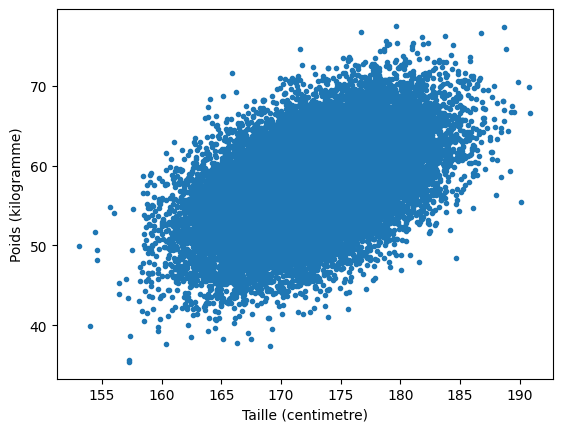

,Index,TAILLE,POIDS
0,1,167.089607,51.252536
1,2,181.648633,61.909598
2,3,176.272800,69.411834
3,4,173.270164,64.562251
4,5,172.181037,65.452064
...,...,...,...
24995,24996,176.535461,53.538052
24996,24997,163.952580,54.518718
24997,24998,164.334317,53.644328
24998,24999,171.524117,59.995846


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

df = pd.read_csv('SOCR_Data_Dinov_020108_HeightsWeights.txt', sep='\t', skiprows=5)
df.rename(columns={"Height(Inches)":"TAILLE","Weight(Pounds)":"POIDS"},inplace=True)

df['TAILLE'] = df['TAILLE']*2.54
df['POIDS'] = df['POIDS']*0.45359237

plt.plot(df['TAILLE'], df['POIDS'], '.')
plt.xlabel('Taille (centimetre)')
plt.ylabel('Poids (kilogramme)')
plt.show()

df

In [31]:
cov = df.cov()
cov

,Index,TAILLE,POIDS
Index,5.208542e+07,335.549750,-277.021810
TAILLE,3.355497e+02,23.331451,12.847375
POIDS,-2.770218e+02,12.847375,27.976633


In [32]:
a = df.cov()['TAILLE']['POIDS']/df.cov()['TAILLE']['TAILLE']
b = df['POIDS'].mean() - a * df['TAILLE'].mean()
a,b

(np.float64(0.5506462160273652), np.float64(-37.45572700115621))

In [33]:
df['Modele Poids vs Taille'] = a * df['TAILLE'] + b
df

,Index,TAILLE,POIDS,Modele Poids vs Taille
0,1,167.089607,51.252536,54.551533
1,2,181.648633,61.909598,62.568406
2,3,176.272800,69.411834,59.608223
3,4,173.270164,64.562251,57.954833
4,5,172.181037,65.452064,57.355110
...,...,...,...,...
24995,24996,176.535461,53.538052,59.752857
24996,24997,163.952580,54.518718,52.824141
24997,24998,164.334317,53.644328,53.034343
24998,24999,171.524117,59.995846,56.993379


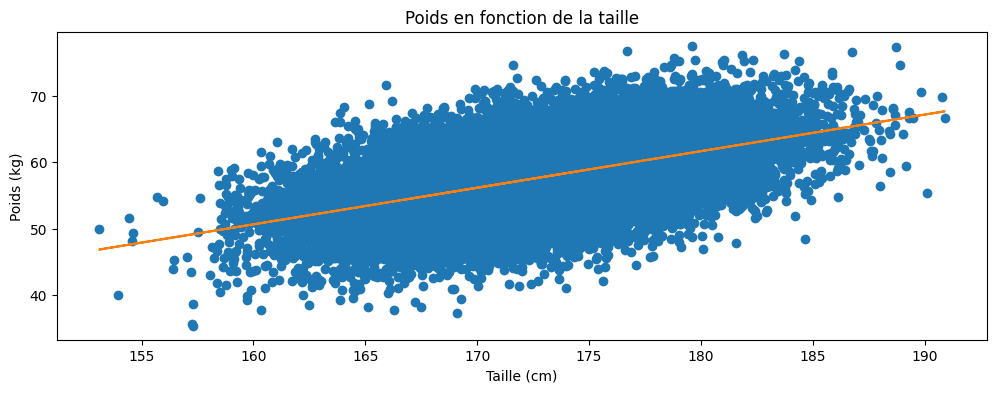

Poids d'un étudiant de 178 cm : 60.559299451714786 kg


In [34]:
plt.figure(figsize=(12,4))
plt.plot(df['TAILLE'], df['POIDS'], 'o')
plt.plot(df['TAILLE'], df['Modele Poids vs Taille'], '-')
plt.xlabel('Taille (cm)')
plt.ylabel('Poids (kg)')
plt.title('Poids en fonction de la taille')
plt.show()

print(f"Poids d'un étudiant de 178 cm : {a*178+b} kg")

In [35]:
aa = df.cov()['TAILLE']['POIDS']/df.cov()['POIDS']['POIDS']
bb = df['TAILLE'].mean() - aa * df['POIDS'].mean()
aa,bb

(np.float64(0.4592180684854003), np.float64(146.23214315389677))

In [36]:
df['Modele Taille vs poids'] = aa * df['POIDS'] + bb
df

,Index,TAILLE,POIDS,Modele Poids vs Taille,Modele Taille vs poids
0,1,167.089607,51.252536,54.551533,169.768234
1,2,181.648633,61.909598,62.568406,174.662149
2,3,176.272800,69.411834,59.608223,178.107312
3,4,173.270164,64.562251,57.954833,175.880296
4,5,172.181037,65.452064,57.355110,176.288913
...,...,...,...,...,...
24995,24996,176.535461,53.538052,59.752857,170.817784
24996,24997,163.952580,54.518718,52.824141,171.268124
24997,24998,164.334317,53.644328,53.034343,170.866588
24998,24999,171.524117,59.995846,56.993379,173.783320


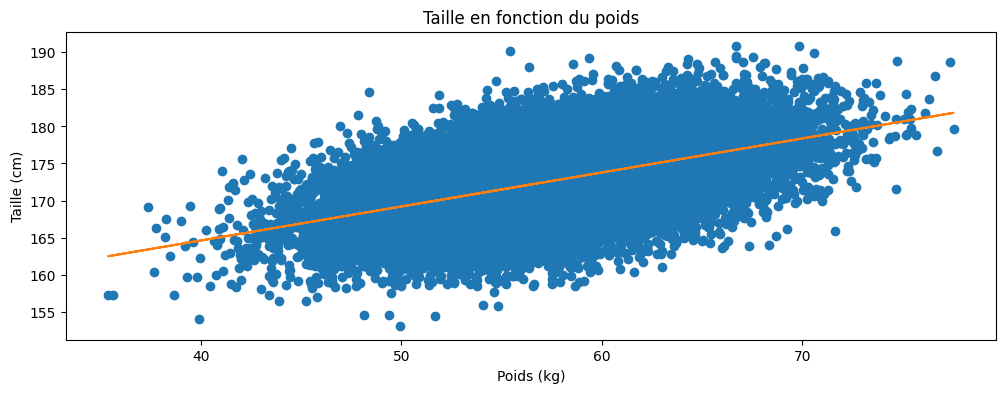

Taille pour un gars de 63 kg : 175.162881468477 cm


In [37]:
plt.figure(figsize=(12,4))
plt.plot(df['POIDS'], df['TAILLE'], 'o')
plt.plot(df['POIDS'], df['Modele Taille vs poids'], '-')
plt.xlabel('Poids (kg)')
plt.ylabel('Taille (cm)')
plt.title('Taille en fonction du poids')
plt.show()

print(f"Taille pour un gars de 63 kg : {aa*63+bb} cm")

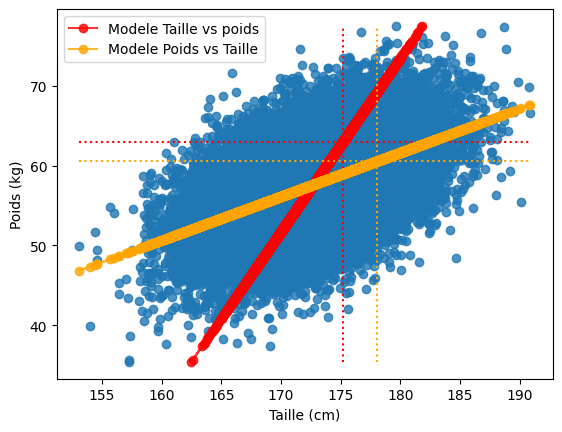

In [38]:
plt.plot(df['TAILLE'],df['POIDS'],'o',alpha=0.8)

plt.plot(df['Modele Taille vs poids'], df['POIDS'], '-o', alpha=0.8, color='red', label='Modele Taille vs poids')
plt.hlines(y=63, xmin=np.min(df['TAILLE']), xmax=np.max(df['TAILLE']), color='red', linestyles='dotted')
plt.vlines(x=aa*63+bb, ymin=np.min(df['POIDS']), ymax=np.max(df['POIDS']), color='red', linestyles='dotted')

plt.plot(df['TAILLE'], df['Modele Poids vs Taille'], '-o', alpha=0.8, color='orange', label='Modele Poids vs Taille')
plt.vlines(x=178, ymin=np.min(df['POIDS']), ymax=np.max(df['POIDS']), color='orange', linestyles='dotted')
plt.hlines(y=a*178+b, xmin=np.min(df['TAILLE']), xmax=np.max(df['TAILLE']), color='orange', linestyles='dotted')

plt.ylabel('Poids (kg)')
plt.xlabel('Taille (cm)')
plt.legend()
plt.show()